MSE: 3.5975333408201493
R^2: 0.9468659309158035


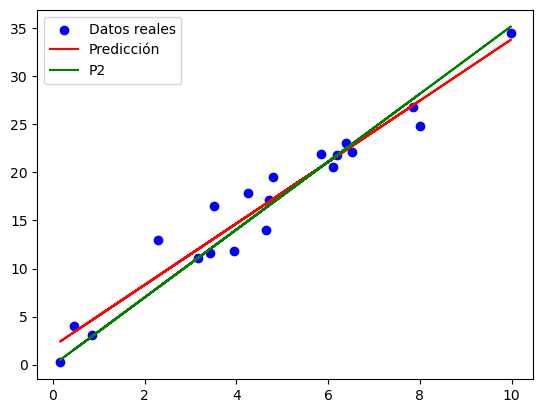

In [62]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datos simulados para regresión simple
X = np.random.rand(100, 1) * 10  # Variable independiente
y = 3.5 * X + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
model = LinearRegression()
model.fit(X_test, y_test)
model2 = LinearRegression()
model2.fit(X_train, y_train)


# Predicciones
y_pred = model.predict(X_test) # regresion con solo el set de prueba
y_pred2 = model2.predict(X_test) # regresion con solo el set de train
# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

# Visualizar
plt.scatter(X_test, y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.plot(X_test, y_pred2, color="green", label="P2")
#plt.scatter(X_train, y_train, color="orange", label="Original")
plt.legend()
plt.show()

MSE: 130689319083.19, R²: 0.27


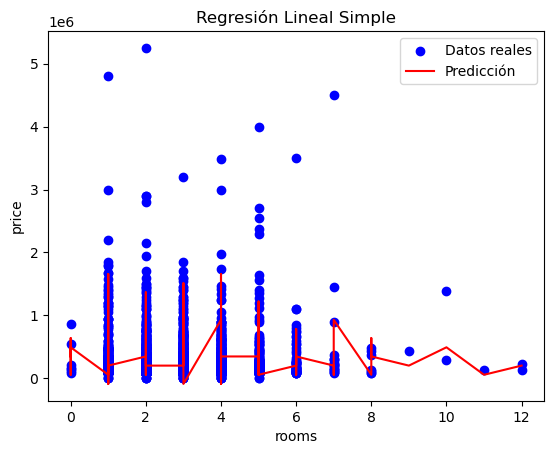

In [74]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar dataset
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv"
data = pd.read_csv(url)
data = data.dropna()
data['rooms'] = data['rooms'].str.replace(r'\D+', '', regex=True)
# data['price'] = data['price'].str.replace(r'\D+','',regex=True)
# Usar dos columnas: 'rooms' como predictora y 'price' como dependiente
#X =	data[['total_square']].values
X = data[['rooms']].values
y = data['price'].values

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación y visualización
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

# Visualizar resultados
X_test = np.sort(np.array(X_test).flatten().astype(int))
y_test = np.array(y_test)
y_pred = np.array(y_pred)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
#TypeError: unhashable type: 'numpy.ndarray'
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('rooms')
plt.ylabel('price')
plt.legend()
plt.title('Regresión Lineal Simple')
plt.show()


In [82]:
# Usar múltiples columnas como predictores
X = data[['total_square', 'rooms']].values  # Altura y diámetro como variables independientes
y = data['price'].values  # Grosor como dependiente

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, R²: {r2:.2f}")


MSE: 225277701665.11, R²: -0.26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: operands could not be broadcast together with shapes (2,) (50,50) 

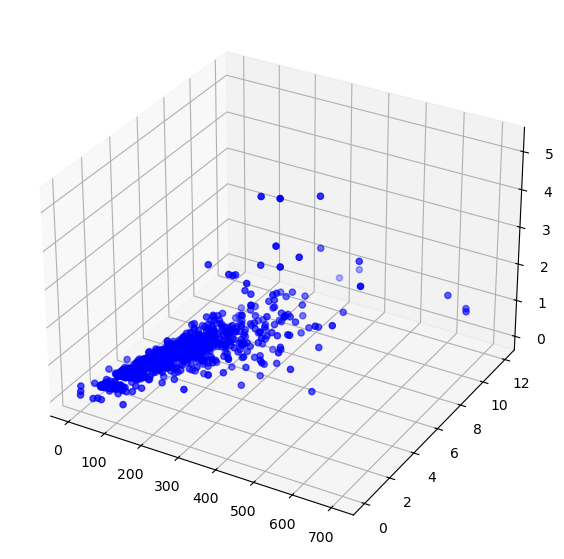

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Datos de ejemplo (usando el dataset original)
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv"
data = pd.read_csv(url)

# Variables independientes y dependiente
data = data.dropna()
data['rooms'] = data['rooms'].str.replace(r'\D+', '', regex=True)

X = data[['total_square', 'rooms']].values  # Altura y diámetro
y = data['price'].values  # Grosor

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo y entrenar
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
X_test = X_test.astype('float64') 
y_test = y_test.astype('float64') 
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Datos reales')

# Plano de regresión
x_surf, y_surf = np.meshgrid(
    np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50),
    np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50)
)
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Plano ajustado')

# Etiquetas
ax.set_xlabel('total_square')
ax.set_ylabel('rooms')
ax.set_zlabel('price')
plt.title('Regresión Múltiple: Plano de Ajuste')
plt.legend()
plt.show()


In [ ]:
Correlaciones 

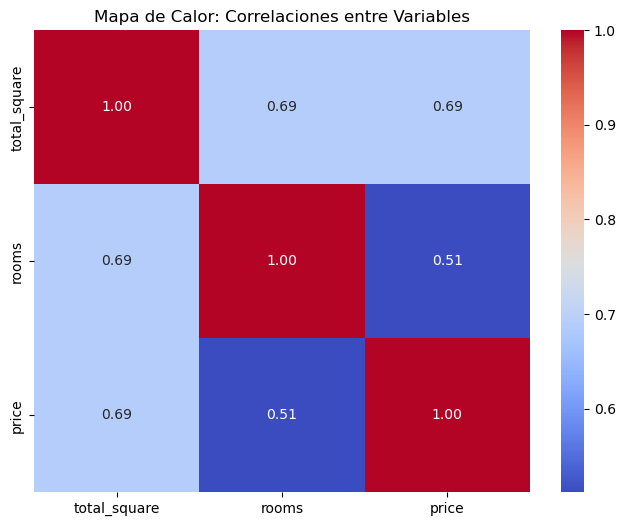

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset de ejemplo
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv"
data = pd.read_csv(url)

# Selección de variables predictoras y objetivo
data = data.dropna()
data['rooms'] = data['rooms'].str.replace(r'\D+', '', regex=True)
predictors = data[['total_square', 'rooms']]
target = data['price']  # Variable dependiente

# Agregar la variable objetivo a los predictores para analizar relaciones
analysis_data = predictors.copy()
analysis_data['price'] = target

# Calcular matriz de correlación
correlation_matrix = analysis_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor: Correlaciones entre Variables')
plt.show()


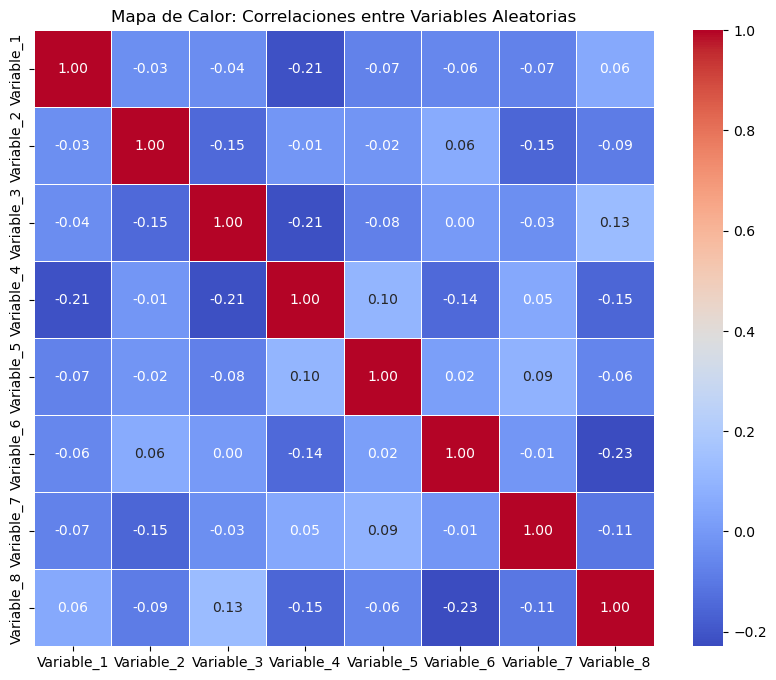

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generar datos aleatorios para 8 variables predictoras
np.random.seed(42)  # Para reproducibilidad
num_samples = 100  # Número de muestras
data = pd.DataFrame({
    'Variable_1': np.random.uniform(0, 100, num_samples),
    'Variable_2': np.random.uniform(50, 150, num_samples),
    'Variable_3': np.random.uniform(-50, 50, num_samples),
    'Variable_4': np.random.uniform(10, 200, num_samples),
    'Variable_5': np.random.normal(0, 1, num_samples),
    'Variable_6': np.random.poisson(5, num_samples),
    'Variable_7': np.random.exponential(1, num_samples),
    'Variable_8': np.random.beta(2, 5, num_samples)
})

# Calcular matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor: Correlaciones entre Variables Aleatorias')
plt.show()


In [ ]:
Modelos de estadistica espacial

C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Users\mfrch\AppData\Local\Temp\ipykernel_18604\2253592148.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  barrios['centroid'] = barrios.geometry.centroid
C:\Users\mfrch\AppData\Local\Temp\ipykernel_18604\2253592148.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid'

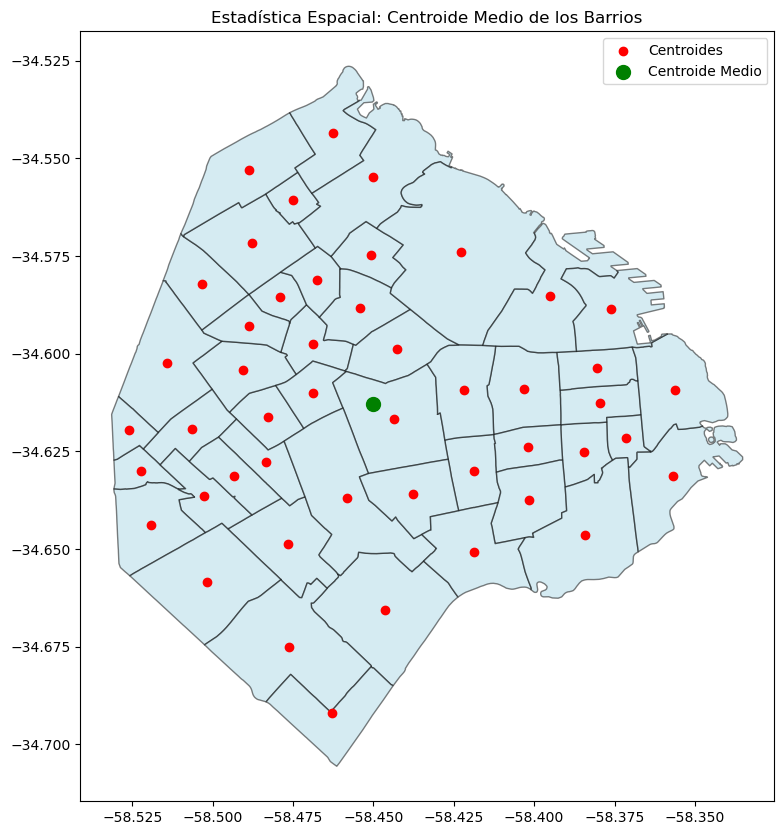

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Cargar datos geográficos (Barrios de Buenos Aires)
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson"
barrios = gpd.read_file(url)

# Calcular centroides de los polígonos (barrios)
barrios['centroid'] = barrios.geometry.centroid

# Extraer coordenadas de los centroides
barrios['centroid_x'] = barrios.centroid.x
barrios['centroid_y'] = barrios.centroid.y

# Calcular el centroide medio (promedio de coordenadas)
mean_centroid_x = barrios['centroid_x'].mean()
mean_centroid_y = barrios['centroid_y'].mean()
mean_centroid = Point(mean_centroid_x, mean_centroid_y)

# Visualizar polígonos, centroides y el centroide medio
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
barrios.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Barrios')
barrios.centroid.plot(ax=ax, color='red', label='Centroides')
ax.scatter(mean_centroid_x, mean_centroid_y, color='green', s=100, label='Centroide Medio')
plt.title("Estadística Espacial: Centroide Medio de los Barrios")
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Users\mfrch\AppData\Local\Temp\ipykernel_18604\1306260639.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  barrios['centroid'] = barrios.geometry.centroid
C:\Users\mfrch\AppData\Local\Temp\ipykernel_18604\1306260639.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid'

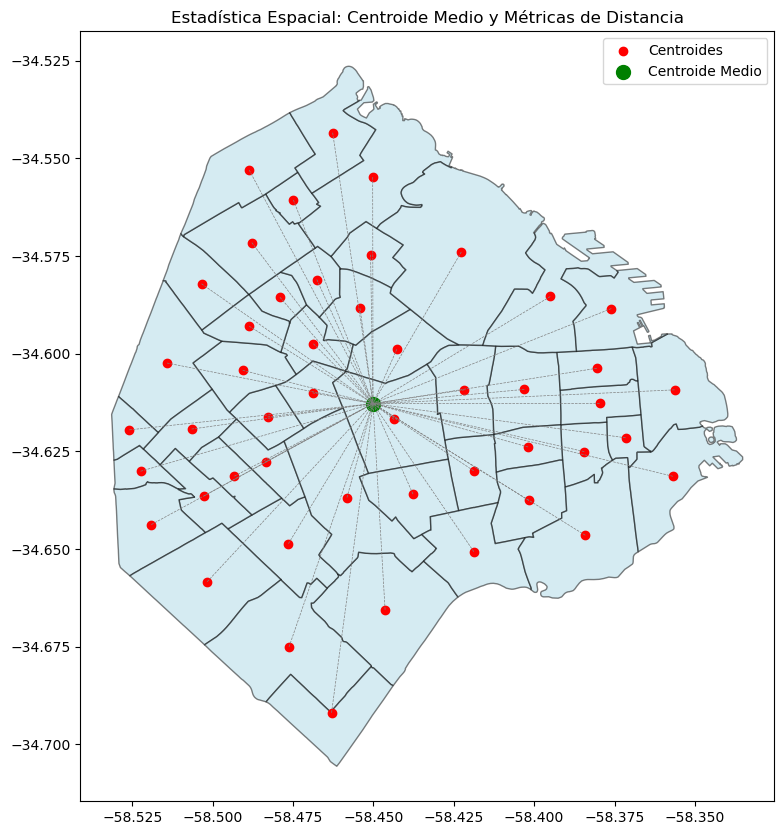

Distancia Promedio al Centroide Medio: 0.05
Distancia Promedio al Vecino Más Cercano: 0.00


In [5]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos geográficos (Barrios de Buenos Aires)
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson"
barrios = gpd.read_file(url)

# Calcular centroides de los polígonos (barrios)
barrios['centroid'] = barrios.geometry.centroid

# Extraer coordenadas de los centroides
barrios['centroid_x'] = barrios.centroid.x
barrios['centroid_y'] = barrios.centroid.y

# Centroide medio (promedio de coordenadas)
mean_centroid_x = barrios['centroid_x'].mean()
mean_centroid_y = barrios['centroid_y'].mean()
mean_centroid = Point(mean_centroid_x, mean_centroid_y)

# MÉTRICA 1: Distancia Promedio al Centroide Medio
barrios['distance_to_mean'] = barrios.centroid.apply(lambda x: x.distance(mean_centroid))
average_distance_to_mean = barrios['distance_to_mean'].mean()

# MÉTRICA 2: Vecino Más Cercano
def find_nearest_neighbor(centroid, all_centroids):
    # Encuentra el vecino más cercano, excluyendo el propio punto
    nearest_geom = nearest_points(centroid, all_centroids.unary_union)[1]
    return centroid.distance(nearest_geom)

# Calcular la distancia al vecino más cercano
barrios['nearest_neighbor_distance'] = barrios.centroid.apply(lambda x: find_nearest_neighbor(x, barrios.centroid))
average_nearest_neighbor_distance = barrios['nearest_neighbor_distance'].mean()

# Visualizar Polígonos, Centroides, Centroide Medio, y Distancias
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
barrios.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Barrios')
barrios.centroid.plot(ax=ax, color='red', label='Centroides')
ax.scatter(mean_centroid_x, mean_centroid_y, color='green', s=100, label='Centroide Medio')

# Agregar distancias al gráfico
for _, row in barrios.iterrows():
    ax.plot(
        [row['centroid_x'], mean_centroid_x],
        [row['centroid_y'], mean_centroid_y],
        color='gray', linestyle='--', linewidth=0.5
    )

plt.title("Estadística Espacial: Centroide Medio y Métricas de Distancia")
plt.legend()
plt.show()

# Mostrar métricas calculadas
print(f"Distancia Promedio al Centroide Medio: {average_distance_to_mean:.2f}")
print(f"Distancia Promedio al Vecino Más Cercano: {average_nearest_neighbor_distance:.2f}")


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# 1. Cargar datos
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv"
data = pd.read_csv(url)

# Cleanup 
data = data.dropna()
data['rooms'] = data['rooms'].str.replace(r'\D+', '', regex=True)

# Selección de variables predictoras y objetivo
X = data[['total_square', 'rooms']]  # Variables predictoras
y = data['price']  # Variable objetivo

# 2. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear un pipeline de preprocesamiento y modelo
# Preprocesamiento numérico: manejo de valores faltantes y escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combinar preprocesamiento (solo variables numéricas en este caso)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['total_square', 'rooms'])
    ]
)

# Agregar un modelo al pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 4. Definir hiperparámetros para optimización
# Hiperparámetros a optimizar
param_grid = {'model__fit_intercept': [True, False]}  # Hiperparámetros del modelo

# GridSearchCV para encontrar la mejor configuración
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# 5. Evaluar el mejor modelo
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Resultados
print("Mejor configuración:", grid.best_params_)
print(f"MSE en el conjunto de prueba con la mejor configuración: {mse:.2f}")


Mejor configuración: {'model__fit_intercept': True}
MSE en el conjunto de prueba con la mejor configuración: 83203977535.42


In [34]:
print (grid.best_estimator_)
print (grid.best_score_)
print (grid.cv_results_)
print (grid.get_params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_square', 'rooms'])])),
                ('model', LinearRegression())])
0.3579597528756472
{'mean_fit_time': array([0.00313587, 0.01507783]), 'std_fit_time': array([0.00627174, 0.00109568]), 'mean_score_time': array([0.00945787, 0.00223455]), 'std_score_time': array([0.00772359, 0.00317864]), 'param_model__fit_intercept': masked_array(data=[True, False],
             mask=[False, False],
       fill_value=True), 'params': [{'model__fit_intercept': True}, {'model__fit_intercept': False}], 'split0_test_score': array([ 0.4

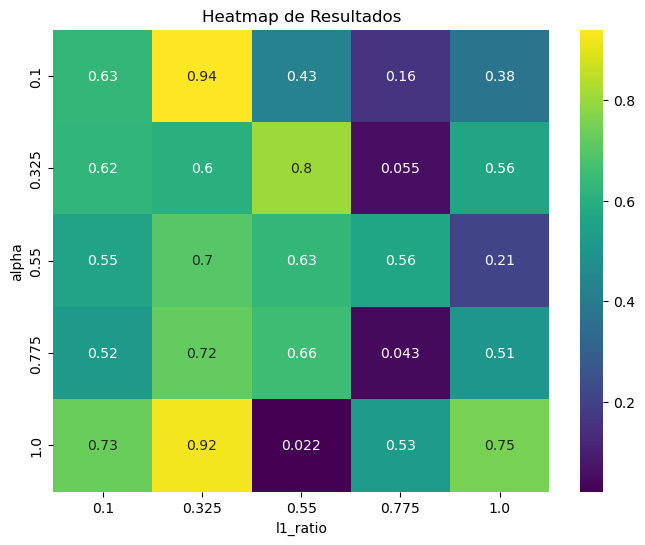

In [38]:
 # Ejemplos de Graficos de hyperparametros

import seaborn as sns
import numpy as np

# Simular datos para ejemplo: combinaciones de alpha y l1_ratio
alpha = np.linspace(0.1, 1.0, 5)
l1_ratio = np.linspace(0.1, 1.0, 5)
scores = np.random.rand(5, 5)  # Reemplazar con tus resultados reales

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, xticklabels=l1_ratio, yticklabels=alpha, cmap='viridis')
plt.title('Heatmap de Resultados')
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.show()


In [36]:
# Resultados completos de la búsqueda
results = pd.DataFrame(grid.cv_results_)

# Mostrar las 5 mejores combinaciones
print("Top 5 combinaciones de hiperparámetros:")
print(results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).head())


Top 5 combinaciones de hiperparámetros:
                            params  mean_test_score  std_test_score
0   {'model__fit_intercept': True}         0.357960        0.322544
1  {'model__fit_intercept': False}        -0.368073        0.278696


In [ ]:
Interpretacion de resultados

In [ ]:
# Residuos
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


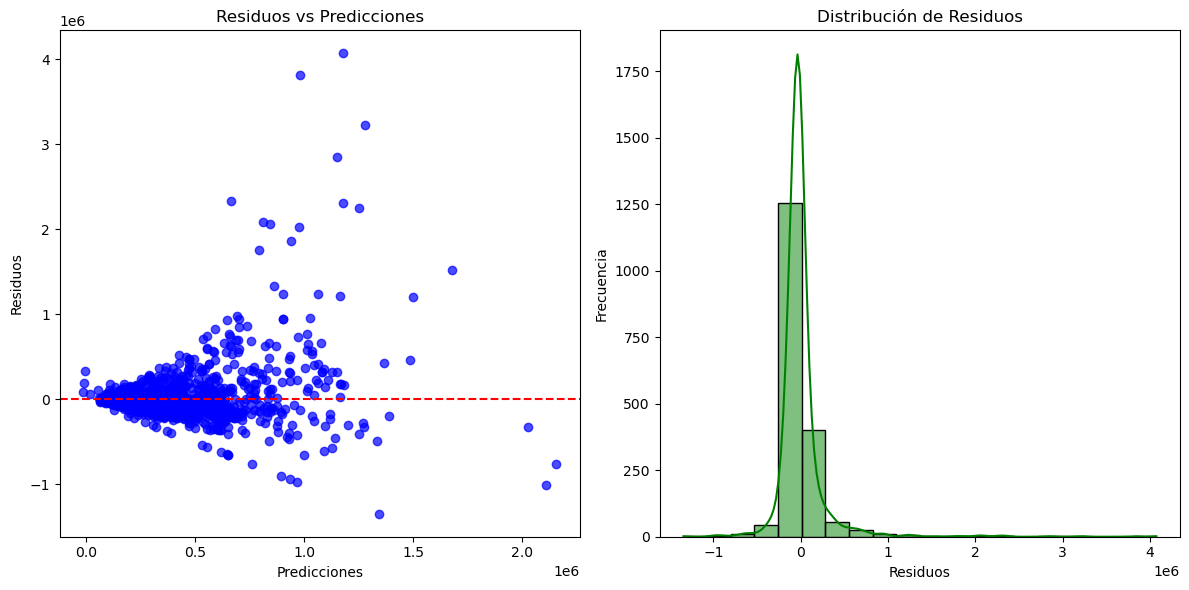

Promedio de residuos: 4101.06063523868
Desviación estándar de residuos: 288500.8074151066


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv"
data = pd.read_csv(url)


# Cleanup 
data = data.dropna()
data['rooms'] = data['rooms'].str.replace(r'\D+', '', regex=True)

# Selección de variables predictoras y objetivo
X = data[['total_square', 'rooms']]  # Variables predictoras
y = data['price']  # Variable objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular residuos
residuos = y_test - y_pred

# Visualización de residuos
plt.figure(figsize=(12, 6))

# Gráfico 1: Residuos vs Predicciones
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")

# Gráfico 2: Distribución de Residuos
plt.subplot(1, 2, 2)
sns.histplot(residuos, kde=True, color='green', bins=20)
plt.title("Distribución de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Métricas adicionales
print("Promedio de residuos:", residuos.mean())
print("Desviación estándar de residuos:", residuos.std())


In [40]:
# Visualización de resultados espaciales
data["predictions"] = model.predy.flatten()

# Mapa
data.plot(column="predictions", cmap="coolwarm", legend=True)
plt.title("Predicciones de precios de casas")
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'predy'